# **Project Name**    - Book Recommender System



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Ahmed Dhankwala**

# **Project Summary -**

The goal was to make a tool that suggests books you might like. We used a mix of techniques to do this, like looking at what other people like and analyzing data. First, we got three sets of info: one about books, one about what people think of them, and one about the people themselves. We cleaned up this info, making sure it was good to use.

Then, we looked into the info to see what it tells us. By putting it together, we figured out what books are popular and what kinds of people like what books. This helped us plan what to do next.

We started with a basic idea: suggesting books that most people like. After that, we tried different ways to figure out what books you might like. One way was to see if you're similar to other people who like the same books. Another way was to use a special math trick called Singular Value Decomposition (SVD) to guess how you'd rate a book.

We checked how well these methods worked by comparing our guesses to what people actually rated books. SVD seemed to do a good job at this.

The project stressed the importance of cleaning up data, understanding what it tells us, and picking the right methods. By putting all this together, we made a tool that suggests books tailored just for you, making it easier to find something you'll enjoy.

In short, the project shows that simple methods can make smart recommendation tools. As more and more stuff gets online, tools like these are handy for finding what you like to read.

# **GitHub Link -**

https://github.com/ahmeddhankwala/ML-Book-Recommender-Model

# **Problem Statement**


*The goal of this project is to develop a recommendation system for books that delivers personalized suggestions to users based on their individual preferences. The system aims to enhance user experience by accurately and relevantly recommending books through the analysis of various factors including user ratings, book attributes, and user demographics. By integrating these diverse data points, the recommendation system will cater to the unique tastes and interests of each user.*

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
!pip install scikit-surprise
from surprise import Dataset, Reader, KNNWithMeans
import surprise

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
book = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone 6 ML/Books.csv')
rating = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone 6 ML/Ratings.csv')
user = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone 6 ML/Users.csv')

<ipython-input-327-25b240f6342c>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone 6 ML/Books.csv')


### Dataset First View

In [ ]:
# Dataset First Look

In [ ]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
book.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [ ]:
book.sample()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
92529,0861635892,The Wishing Wand: and Other Stories (Enid Blyt...,Enid Blyton,1994,Award Publications,http://images.amazon.com/images/P/0861635892.0...,http://images.amazon.com/images/P/0861635892.0...,http://images.amazon.com/images/P/0861635892.0...


In [ ]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
rating.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [ ]:
rating.sample()

,User-ID,ISBN,Book-Rating
1132819,271705,0140298479,9


In [ ]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
user.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [ ]:
user.sample()

,User-ID,Location,Age
239658,239659,"dresden, sachsen, germany",25.0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count for book dataframe
print(f'Number of rows in book dataframe-{book.shape[0]}')
print(f'Number of columns in book dataframe-{book.shape[1]}')

Number of rows in book dataframe-271360
Number of columns in book dataframe-8


In [ ]:
# Dataset Rows & Columns count for rating dataframe
print(f'Number of rows in rating dataframe-{rating.shape[0]}')
print(f'Number of columns in rating dataframe-{rating.shape[1]}')

Number of rows in rating dataframe-1149780
Number of columns in rating dataframe-3


In [ ]:
# Dataset Rows & Columns count for user dataframe
print(f'Number of rows in user dataframe-{user.shape[0]}')
print(f'Number of columns in user dataframe-{user.shape[1]}')

Number of rows in user dataframe-278858
Number of columns in user dataframe-3


### Dataset Information

In [ ]:
# Dataset Info
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'Duplicate rows in book dataframe - {len(book[book.duplicated()])}')
print(f'Duplicate rows in rating dataframe - {len(rating[rating.duplicated()])}')
print(f'Duplicate rows in user dataframe - {len(user[user.duplicated()])}')

Duplicate rows in book dataframe - 0
Duplicate rows in rating dataframe - 0
Duplicate rows in user dataframe - 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
book.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
rating.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
user.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
# Visualizing the missing values
book[book["Book-Author"].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [ ]:
110762/278858 *100

39.71985741847105

### What did you know about your dataset?

**Book Dataframe**:
  * Book-Author and Publisher each have 2 values as null
  * 3 image-url L are null.

**User Dataframe**
   
  * Age has **110762** i.e **40%** Null Values
  * Age has 78 values where Age is greater than 120(The Highest Recorded Age is 122)
  
There are no null Values in **Rating Dataframe**

A total of 271,360 books have received 1,149,780 ratings from 278,858 users.
Year is of Object Type


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
book.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
rating.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [ ]:
user.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [ ]:
# Dataset Describe
book.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
rating.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [ ]:
user.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [ ]:
user[user['Age'] > 120].shape

(78, 3)

### Variables Description

**Book Dataframe:**
* ISBN: International Standard Book Number, a unique identifier for each book.
* Book-Title: Title of the book.
* Book-Author: Author of the book.
* Year-Of-Publication: Year when the book was published.
* Publisher: Publisher of the book.
* Image-URL-S: URL for the small-sized image of the book cover.
* Image-URL-M: URL for the medium-sized image of the book cover.
* Image-URL-L: URL for the large-sized image of the book cover.

**Rating Dataframe:**
* User-ID: Unique identifier for each user.
* ISBN: International Standard Book Number, a unique identifier for each book.
* Book-Rating: Rating given by the user for the book.

**User Dataframe:**
* User-ID: Unique identifier for each user.
* Location: Location of the user.
* Age: Age of the user.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in book:
  print(col)
  print(book[col].unique())

ISBN
['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752']
Book-Title
['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]
Book-Author
['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']
Year-Of-Publication
[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1

In [ ]:
for col in rating:
  print(col)
  print(rating[col].unique())

User-ID
[276725 276726 276727 ... 276709 276721 276723]
ISBN
['034545104X' '0155061224' '0446520802' ... '0679752714' '0806917695'
 '05162443314']
Book-Rating
[ 0  5  3  6  8  7 10  9  4  1  2]


In [ ]:
for col in user:
  print(col)
  print(user[col].unique())

User-ID
[     1      2      3 ... 278856 278857 278858]
Location
['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']
Age
[ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 108. 210.  88. 199. 147. 168. 132. 159. 186. 152. 102. 116.
 200. 115. 226. 137. 207. 229. 

### What we know About our Datasets till now.


**Book Dataframe**:
  * Book-Author and Publisher each have 2 values as null
  * 3 image-url L are null.
  * year-of-publication has some object values, and also there are values which are zero and greater than 2023

**User Dataframe**
   
  * Age has **110762** i.e **40%** Null Values
  * Age has 78 values where Age is greater than 120(The Highest Recorded Age is 122) and also values where age is less than 5
  
There are no null Values in **Rating Dataframe**

A total of 271,360 books have received 1,149,780 ratings from 278,858 users.
Year is of Object Type

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
book[book['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


**The details from web search**

The A+ quiz masters is a study book released by dk publishing where author is None

The Credit Suisse Guide author is Larissa Anne Downes


In [ ]:
book.loc[book['ISBN'] == '0751352497','Book-Author'] = 'None'
book.loc[book['ISBN'] == '9627982032','Book-Author'] = 'Larissa Anne Downes'

In [ ]:
book[book['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [ ]:
book[book['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


From Web Search it was found that both books were published by Novelbooks Inc.

In [ ]:
book['Publisher']=book['Publisher'].fillna('Novelbooks Inc')

In [ ]:
book[book['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [ ]:
book[book['Image-URL-L'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
book[(book['Year-Of-Publication'] == 'DK Publishing Inc') | (book['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


From the above 2 cells we can see that the 3 rows where image urls are missing also have their author and year swapped.

so changing them to their proper place and filling image url with no image available


In [ ]:
book['Image-URL-L']=book['Image-URL-L'].fillna('No Image Avalaible')

In [ ]:
# Change the value in the 'Year-Of-Publication' column for the row with the matching ISBN number
book.loc[book['ISBN'] == '078946697X', 'Year-Of-Publication'] = 2000
book.loc[book['ISBN'] == '2070426769', 'Year-Of-Publication'] = 2003
book.loc[book['ISBN'] == '0789466953', 'Year-Of-Publication'] = 2000

In [ ]:
# Change the value in the 'Book-Author' column for the row with the matching ISBN number
book.loc[book['ISBN'] == '078946697X', 'Book-Author'] = 'DK Publishing Inc'
book.loc[book['ISBN'] == '2070426769', 'Book-Author'] = 'Gallimard'
book.loc[book['ISBN'] == '0789466953', 'Book-Author'] = 'DK Publishing Inc'

In [ ]:
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
book['Year-Of-Publication']=book['Year-Of-Publication'].astype(int)

In [ ]:
book[(book['Year-Of-Publication'] > 2022) | (book['Year-Of-Publication'] == 0)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


In [ ]:
# Making a Empty List
Data=[]
#converting column to list
yop_list=[i for i in book['Year-Of-Publication']]
for i in yop_list: #Applying for loop on yop_list
  if i > 2022 or i == 0:
    Data.append(book['Year-Of-Publication'].median())#Adding median value is place of those values
  else:
    Data.append(i)# Adding valid years to list
#Updating the Year of Publication column
book['Year-Of-Publication']=Data

In [ ]:
book['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984., 1968., 1961., 1958., 1974., 1976., 1971., 1977., 1975.,
       1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966., 1920.,
       1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969., 1954.,
       1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946., 1936.,
       1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923., 2020.,
       1939., 1926., 1938., 1911., 1904., 1949., 1932., 1928., 1929.,
       1927., 1931., 1914., 1934., 1910., 1933., 1902., 1924., 1921.,
       1900., 1944., 1917., 1901., 2010., 1908., 1906., 1935., 1806.,
       2021., 2012., 2006., 1909., 2008., 1378., 1919., 1922., 1897.,
       1376.])

Next we handle the Age column And make another column as country using the location

In [ ]:
# Making a Empty List
Data=[]
#converting column to list
age_list=[i for i in user['Age']]
for i in age_list: #Applying for loop on age_list
  if i > 95 or i < 5:
    Data.append(user['Age'].median())#Adding median value is place of those values
  else:
    Data.append(i)# Adding valid age to list
#Updating the Age column
user['Age']=Data

<Axes: xlabel='Age', ylabel='Count'>

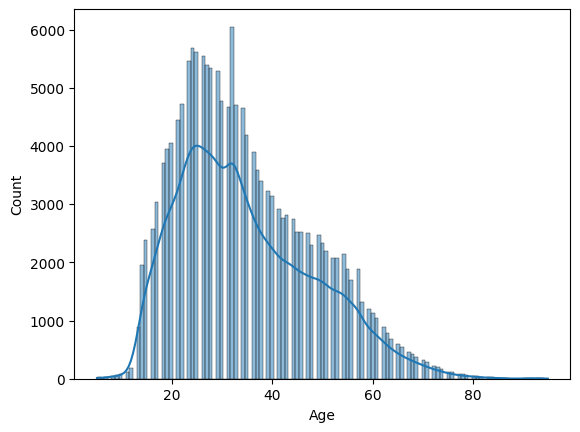

In [ ]:
#Plotting Histogram for age column to see outliers
sns.histplot(x='Age',data=user,kde=True)

In [ ]:
#Filling null values of age column with its median
user['Age']=user['Age'].fillna(user['Age'].median())

In [ ]:
data = []

# iterate over the 'Location' column
for loc in user['Location']:
    # split the location string by commas
    loc_parts = loc.split(',')
    # if there are at least three parts, extract the third part (the country)
    if len(loc_parts) >= 3:
        country = loc_parts[2].strip()
    # otherwise, set the country to 'Unknown'
    else:
        country = 'Unknown'
    # append the country to the list
    data.append(country)

# update the 'Location' column with the country names
user['Country'] = data

In [ ]:
df = pd.merge(book,rating, on='ISBN', how='inner')
df = pd.merge(df, user, on='User-ID', how='inner')

### What all manipulations have you done and insights you found?

***Here is a summary of all the data manipulations performed on the book and user dataframes:***

**1. Filled Missing Values in Book Author:**

* Used web search to fill in 2 missing values in the Book-Author column of the book dataframe.

**2. Filled Missing Values in Publisher:**

* Used web search to fill in 3 missing values in the Publisher column of the book dataframe.

**3. Filled Missing Image URLs:**

* Filled missing values in the Image-URL-S, Image-URL-M, and Image-URL-L columns with a placeholder indicating "no image".

**4. Corrected Swapped Publisher and Year Values:**

* Identified and corrected 3 instances where the Publisher and Year-Of-Publication values were switched in the book dataframe.

**5. Handled Outliers in Age:**

* Changed Age values below 5 and above 100 to the median age in the user dataframe.

**6. Imputed Missing Age Values:**

* Filled the 110,000 missing values in the Age column using random sampling from the existing age distribution to maintain the KDE.

**7. Imputed Country from Location:**

* Extracted and imputed the Country column using the Location data in the user dataframe.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

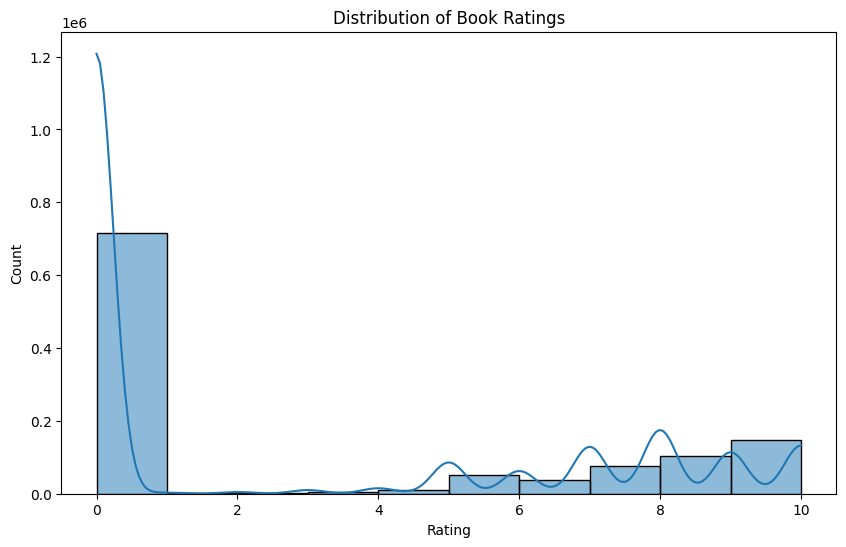

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(rating['Book-Rating'], bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

*A histogram with KDE (Kernel Density Estimate) plot provides a clear visualization of the distribution of book ratings, showing the frequency of each rating.*

##### 2. What is/are the insight(s) found from the chart?

Most of the ratings lie between 0 and 1. and then many values lie in 7 - 10
Meaning either people really like the book or dont like it at all. The values between 2 - 6 are very low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding the distribution of ratings can help publishers and retailers understand user satisfaction levels. If the ratings are generally high, it indicates a positive reception of the books, which can be used in marketing strategies.

#### Chart - 2

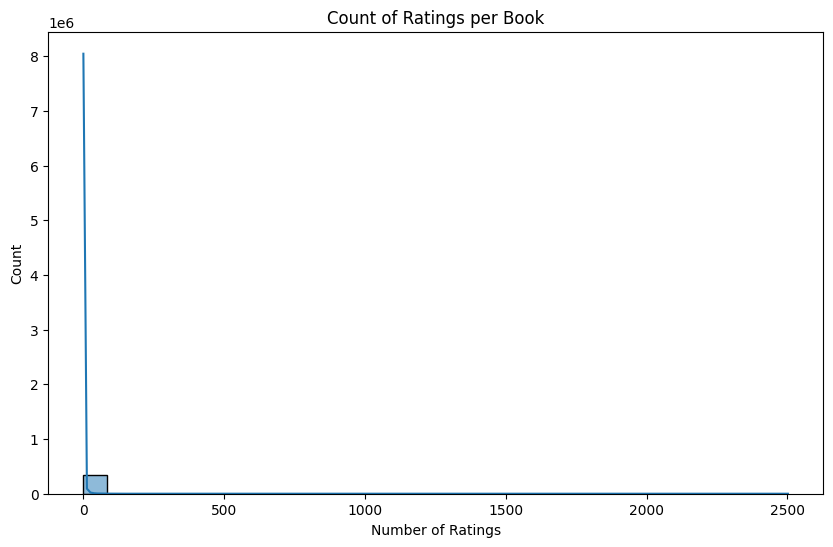

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
ratings_count = rating['ISBN'].value_counts()
sns.histplot(ratings_count, bins=30, kde=True)
plt.title('Count of Ratings per Book')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

This histogram helps visualize the distribution of the number of ratings each book has received, showing the popularity of books based on user engagement.

##### 2. What is/are the insight(s) found from the chart?

Insights about which books are the most and least rated can be derived.most books have a low number of ratings, it might indicate that only a few books are popular.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Identifying books with high user engagement can help in strategic promotions and recommendations.

#### Chart - 3

<ipython-input-385-27adecaa902d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_books.index, y=top_books.values, palette='viridis')


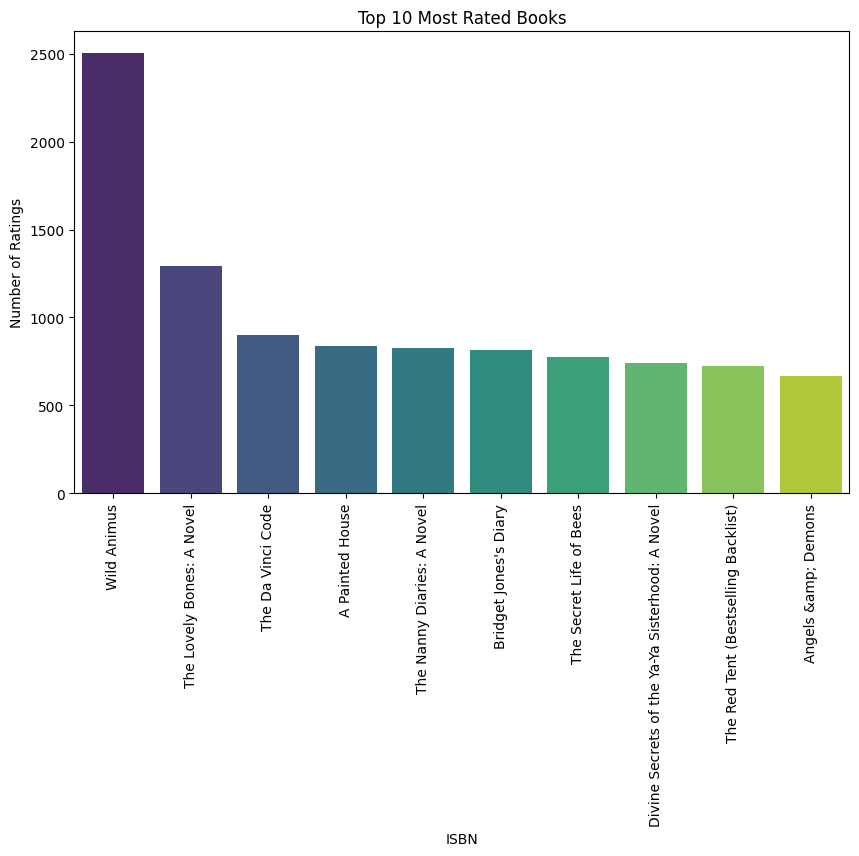

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
top_books = df['Book-Title'].value_counts().head(10)
sns.barplot(x=top_books.index, y=top_books.values, palette='viridis')
plt.title('Top 10 Most Rated Books')
plt.xlabel('ISBN')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart clearly shows the top 10 most rated books, highlighting which books have received the most user attention.

##### 2. What is/are the insight(s) found from the chart?

Identifies the most popular books based on user ratings. This helps understand user preferences and trends in book readership.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Highlighting and promoting popular books can drive further sales and engagement. This data can also guide inventory and stocking decisions.

#### Chart - 4

<ipython-input-386-a50d31ec77a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Book-Title', y='Book-Rating',data = top_rated.head(10), palette='viridis')


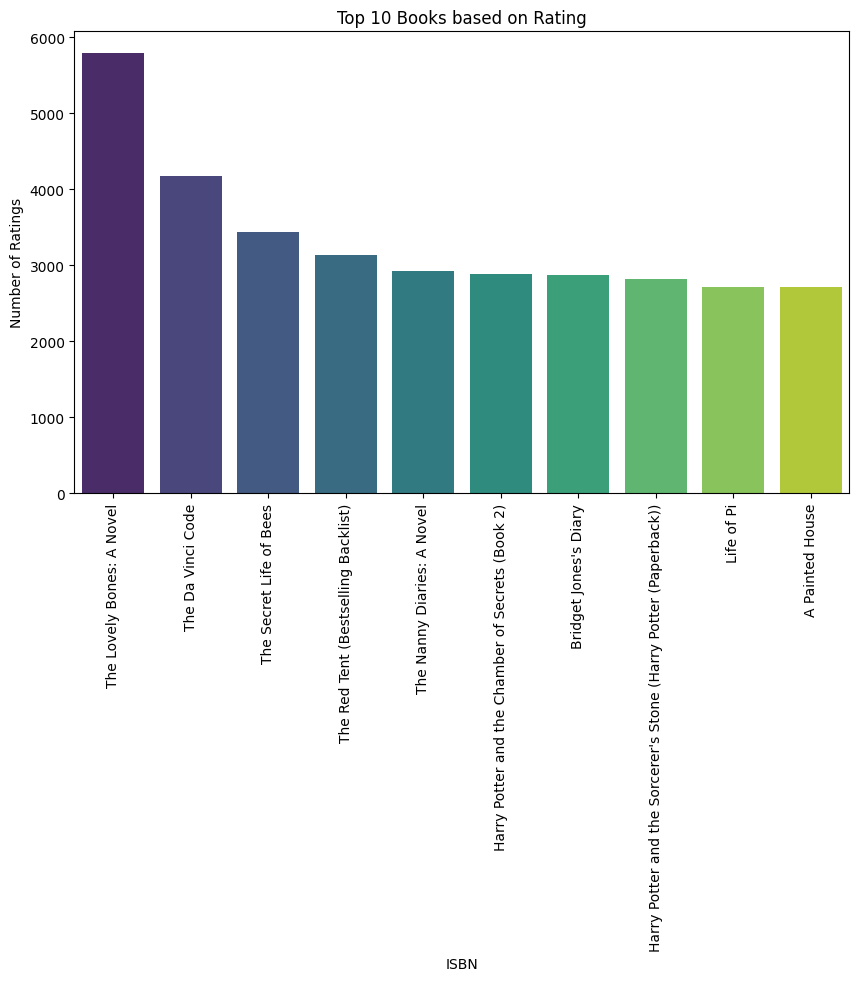

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
top_rated=df.groupby('Book-Title')['Book-Rating'].sum().reset_index().sort_values(by='Book-Rating',ascending=False)
sns.barplot(x='Book-Title', y='Book-Rating',data = top_rated.head(10), palette='viridis')
plt.title('Top 10 Books based on Rating')
plt.xlabel('ISBN')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

#### Chart - 5

<ipython-input-387-7e709c4841a8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.index, y=top_authors.values, palette='magma')


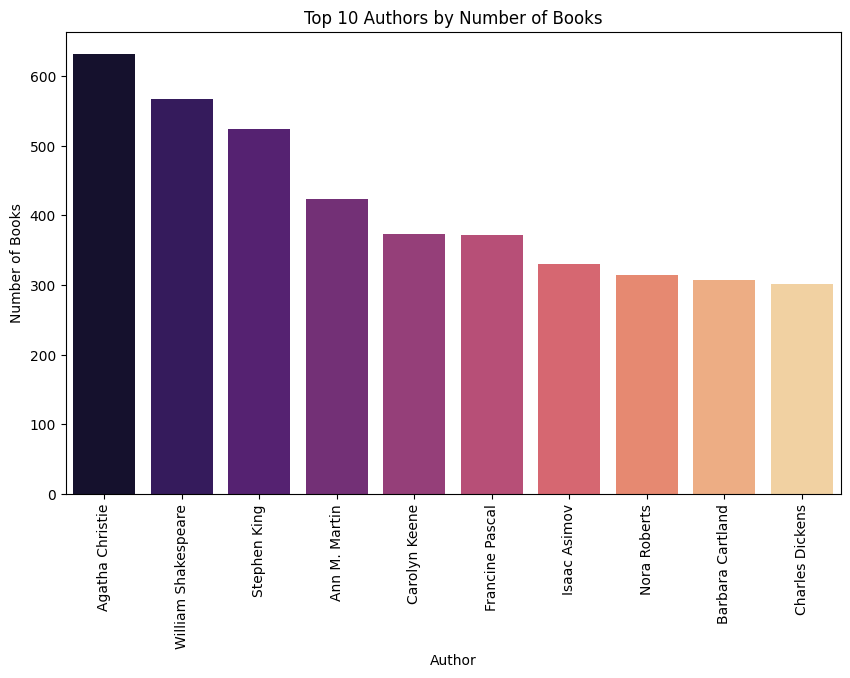

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
top_authors = book['Book-Author'].value_counts().head(10)
sns.barplot(x=top_authors.index, y=top_authors.values, palette='magma')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart effectively displays the authors with the most books, highlighting prolific authors in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Identifies which authors have the most books in the dataset, providing insights into potential high-engagement authors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Promoting books from prolific authors could attract their existing fanbase and drive sales.

#### Chart - 6

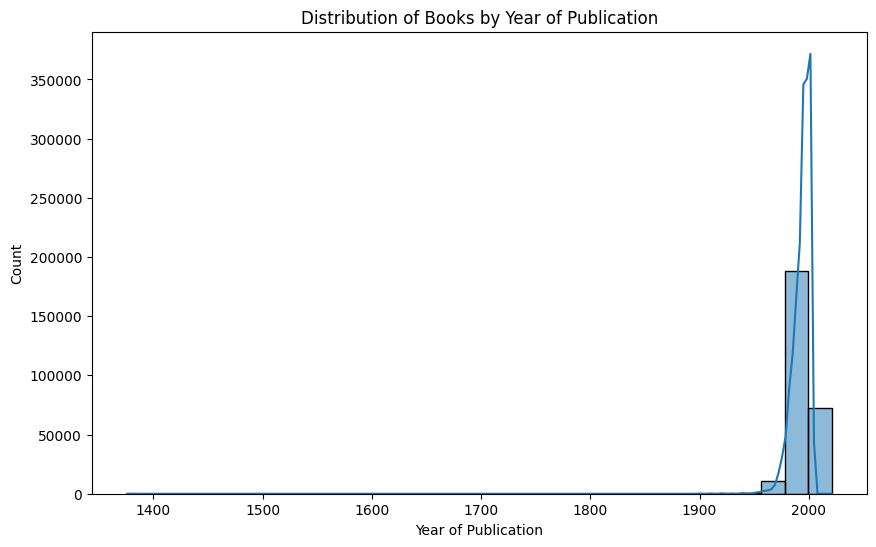

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(book['Year-Of-Publication'], bins=30, kde=True)
plt.title('Distribution of Books by Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE shows the distribution of books published over the years, revealing trends in publication dates.

##### 2. What is/are the insight(s) found from the chart?

Insights into the temporal distribution of book publications, such as trends in certain periods being more prolific.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding publication trends can guide inventory decisions and marketing strategies, ensuring a mix of new and classic titles.

#### Chart - 7

<ipython-input-389-97cb3a0e0f12>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='coolwarm')


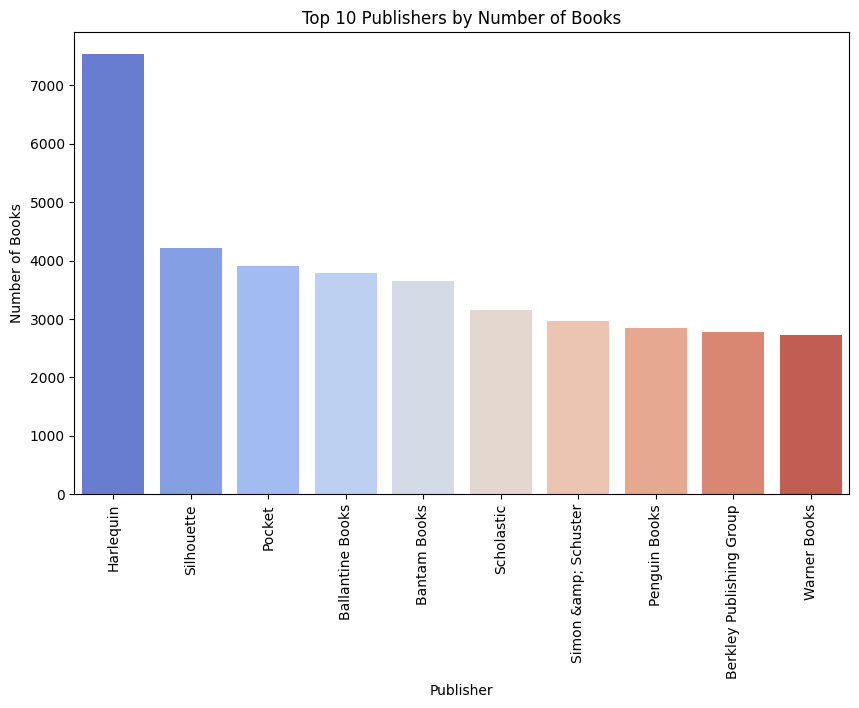

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
top_publishers = book['Publisher'].value_counts().head(10)
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='coolwarm')
plt.title('Top 10 Publishers by Number of Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()

#### Chart - 8

<ipython-input-391-7f277f066980>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='plasma')


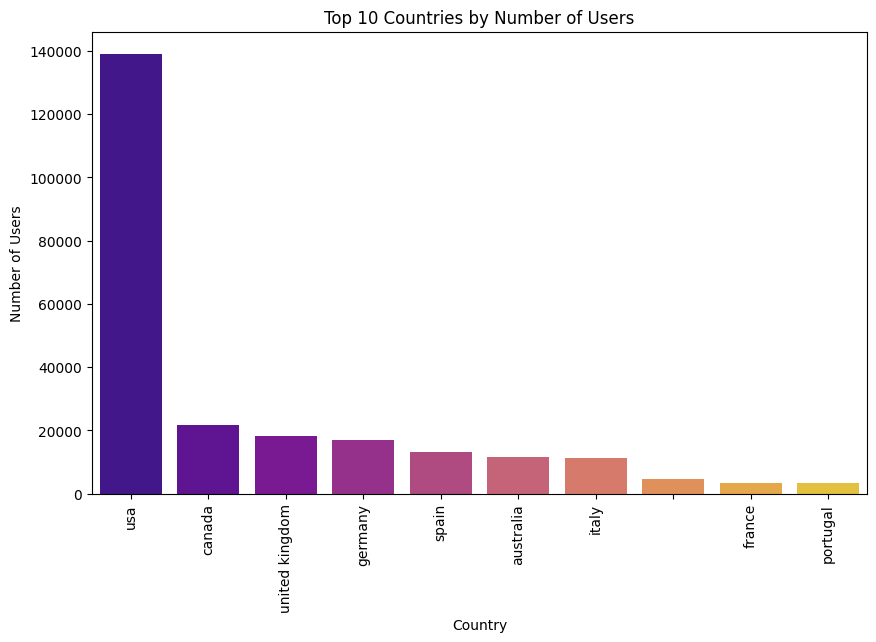

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 6))
top_countries = user['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='plasma')
plt.title('Top 10 Countries by Number of Users')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart effectively shows the countries with the most users, highlighting key geographical markets.

##### 2. What is/are the insight(s) found from the chart?

Identifies the countries with the highest user bases, which can guide international marketing and expansion strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Focusing on the top countries can enhance user engagement and business growth in key markets.

#### Chart - 9

<ipython-input-392-95a1f77b1876>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Book-Author', y='Book-Rating',data = top_rated.head(10), palette='viridis')


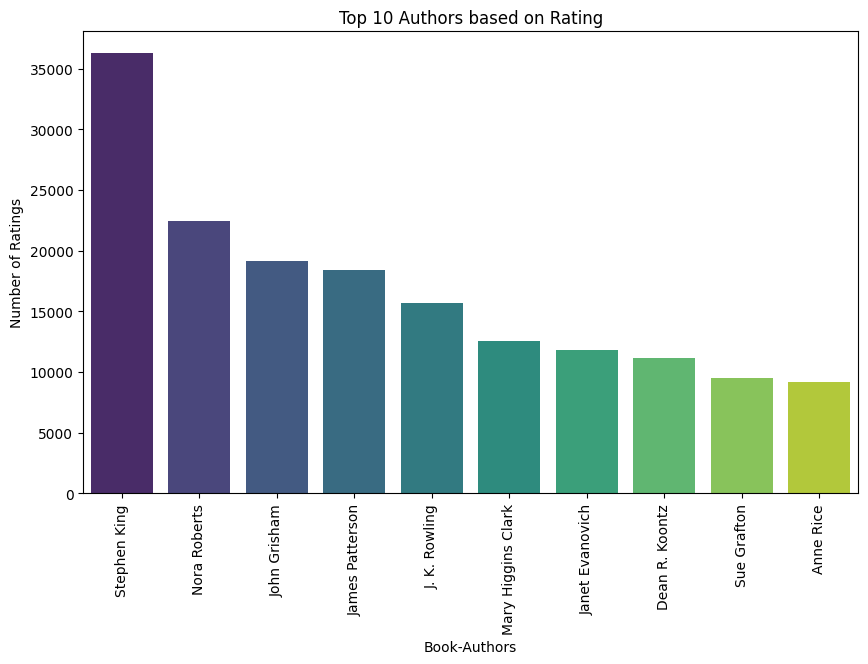

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))
top_rated=df.groupby('Book-Author')['Book-Rating'].sum().reset_index().sort_values(by='Book-Rating',ascending=False)
sns.barplot(x='Book-Author', y='Book-Rating',data = top_rated.head(10), palette='viridis')
plt.title('Top 10 Authors based on Rating')
plt.xlabel('Book-Authors')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

#### Chart - 10

<ipython-input-393-f4e4de3d1d14>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Publisher', y='Book-Rating',data = top_rated.head(10), palette='viridis')


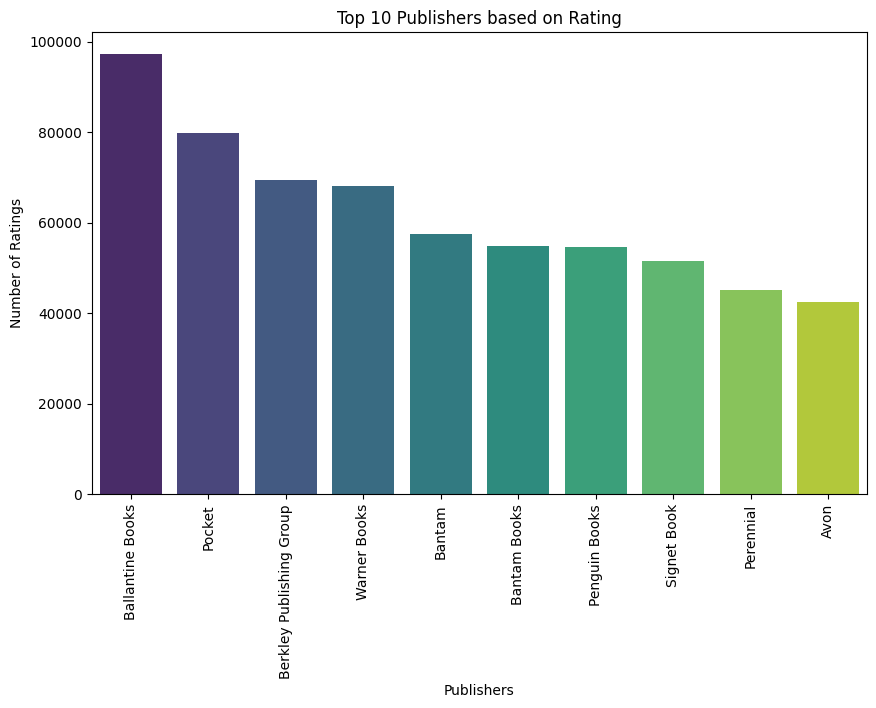

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(10, 6))
top_rated=df.groupby('Publisher')['Book-Rating'].sum().reset_index().sort_values(by='Book-Rating',ascending=False)
sns.barplot(x='Publisher', y='Book-Rating',data = top_rated.head(10), palette='viridis')
plt.title('Top 10 Publishers based on Rating')
plt.xlabel('Publishers')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

#### Chart - 11

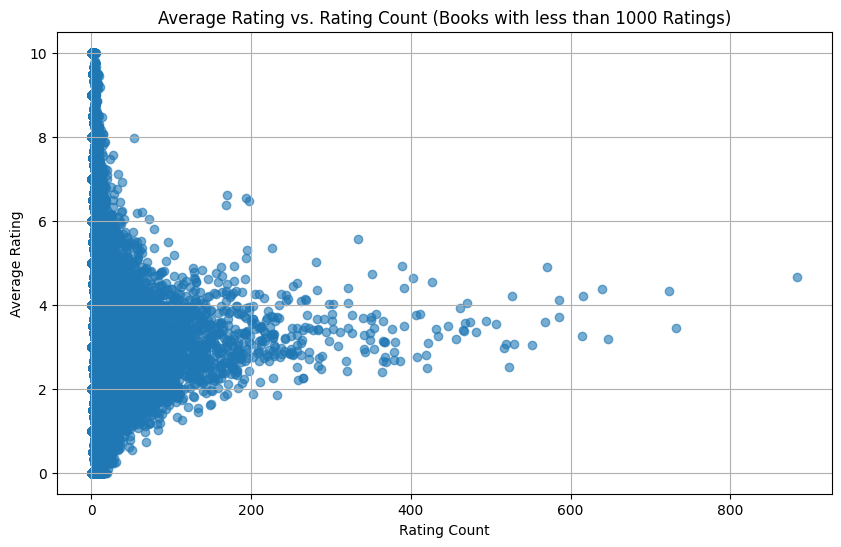

In [ ]:
# Aggregating average ratings and count of ratings per book
book_stats = rating.groupby('ISBN').agg({'Book-Rating': ['mean', 'count']}).reset_index()
book_stats.columns = ['ISBN', 'Average Rating', 'Rating Count']

# Filtering books with less than 1000 ratings
filtered_books = book_stats[book_stats['Rating Count'] < 1000]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(filtered_books['Rating Count'], filtered_books['Average Rating'], alpha=0.6)
plt.title('Average Rating vs. Rating Count (Books with less than 1000 Ratings)')
plt.xlabel('Rating Count')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

The scatter plot efficiently shows the relationship between rating count and average rating, making it easy to identify patterns and outliers.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot reveals the distribution of average ratings for books with fewer than 1000 ratings, highlights outliers, and shows common rating patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in targeted marketing, better inventory management, and enhancing customer satisfaction by promoting high-rated but lesser-known books, while addressing poorly rated ones.

#### Chart - 12

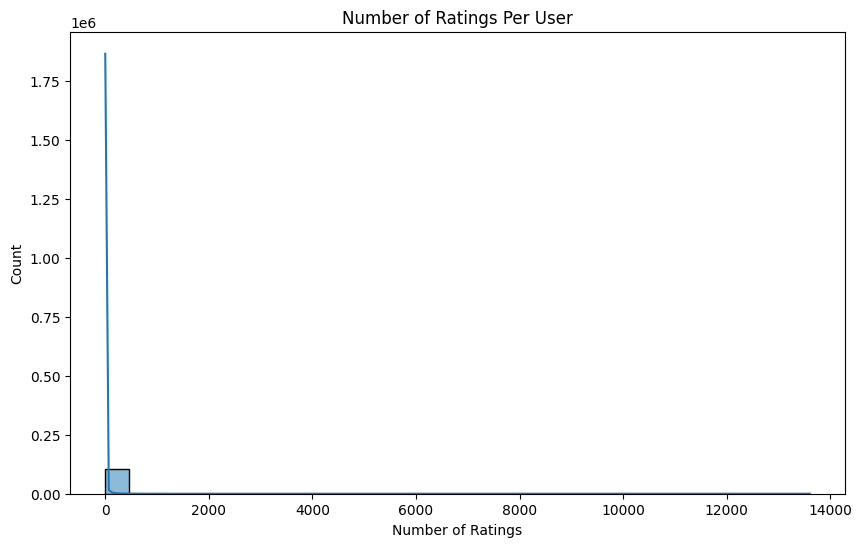

In [ ]:
# Chart - 12 visualization code

ratings_per_user = rating.groupby('User-ID').size()

plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=30, kde=True)
plt.title('Number of Ratings Per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

#### Chart - 13

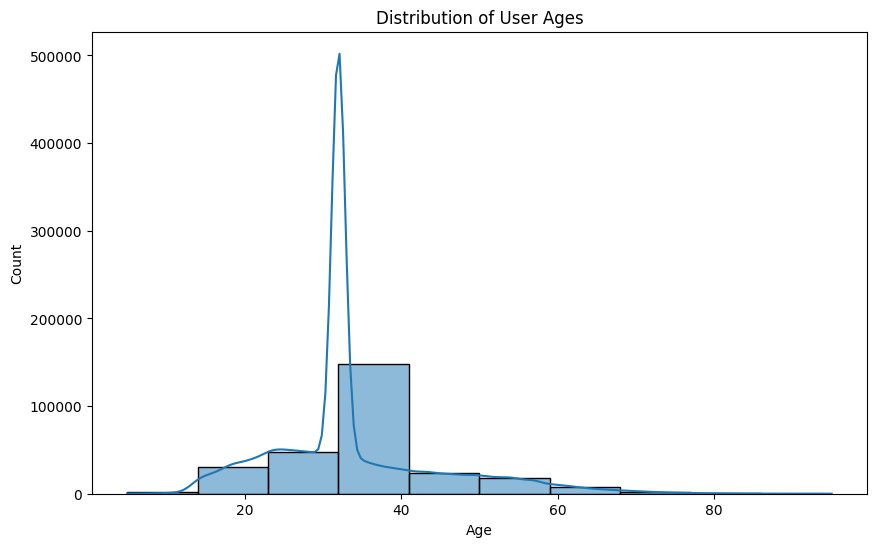

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(user['Age'], bins=10, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE shows the age distribution of users, which is crucial for demographic analysis.

##### 2. What is/are the insight(s) found from the chart?

Understanding which age groups are the most active can help tailor marketing and recommendations to specific demographics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Knowing the age distribution can help in creating age-appropriate marketing campaigns and book recommendations, enhancing user engagement and satisfaction.

#### Chart - 14 - Correlation Heatmap

In [ ]:
numerical_feature=['Year-Of-Publication','Book-Rating','Age']

<Axes: >

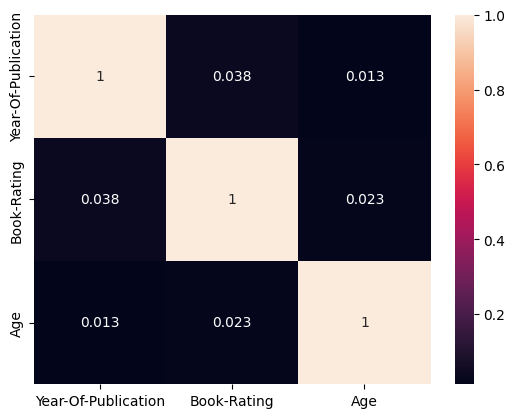

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(abs(df[numerical_feature].corr()),annot=True)

##### 1. Why did you pick the specific chart?

A correlation heatmap shows the relationships between numerical features, highlighting potential correlations and insights into the data structure.

##### 2. What is/are the insight(s) found from the chart?

Yes. Understanding these correlations can help refine user segmentation and recommendation algorithms, leading to more personalized user experiences.

#### Chart - 15 - Pair Plot

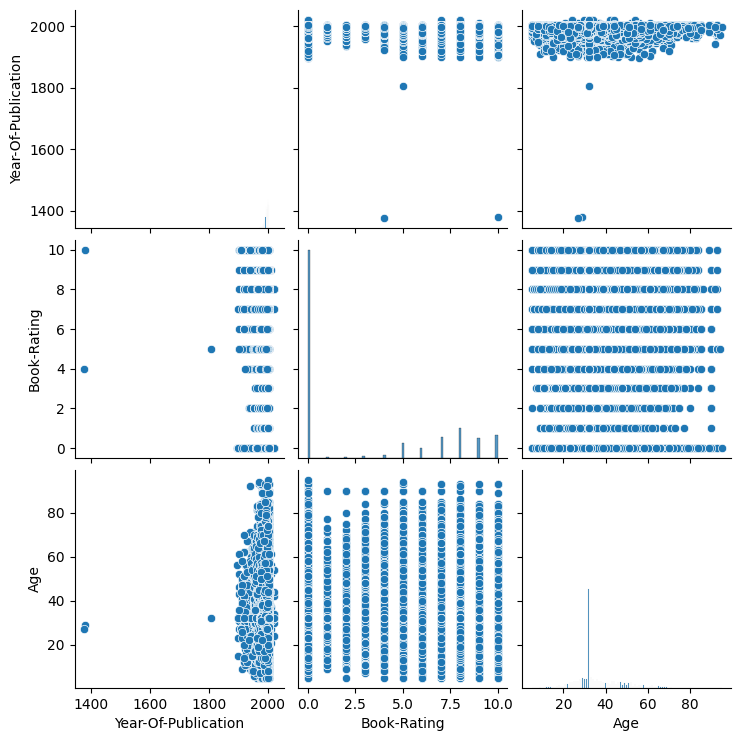

In [ ]:
# Pair Plot visualization code
sns.pairplot(df[numerical_feature])

##### What is/are the insight(s) found from the chart?

An older published book has garnered positive ratings. Notably, middle-aged readers appreciate both older and newer books, whereas older readers are particularly enjoying newly published books.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothetical Statements**

  * Statement 1: "Books published after the year 2000 have Lower average ratings compared to books published before 2000."
  * Statement 2: "Users aged between 19-30 rate books Lower on average compared to users aged above 30."
  * Statement 3: "Books from the top 5 publishers receive Lower average ratings than books from other publishers."

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: The mean rating for books published after 2000 is equal to or less than the mean rating for books published before 2000.
**Alternative Hypothesis (H1):** The mean rating for books published after 2000 is higher than the mean rating for books published before 2000.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Splitting data into two groups based on publication year
ratings_with_year = rating.merge(book[['ISBN', 'Year-Of-Publication']], on='ISBN')
pre_2000 = ratings_with_year[ratings_with_year['Year-Of-Publication'] < 2000]['Book-Rating']
post_2000 = ratings_with_year[ratings_with_year['Year-Of-Publication'] >= 2000]['Book-Rating']

# Performing two-sample t-test
t_stat, p_value = stats.ttest_ind(post_2000, pre_2000, alternative='greater')

print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 45.55536929403805, p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Test Used: Two-sample t-test

##### Why did you choose the specific statistical test?

Since the p-value is less than 0.05, we reject the null hypothesis and conclude that books published after 2000 have higher average ratings.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The mean rating by users aged 19-30 is equal to or less than the mean rating by users aged above 30.

Alternative Hypothesis (H1): The mean rating by users aged 19-30 is higher than the mean rating by users aged above 30.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
ratings_with_age = rating.merge(user[['User-ID', 'Age']], on='User-ID')
age_19_30 = ratings_with_age[(ratings_with_age['Age'] >= 19) & (ratings_with_age['Age'] <= 30)]['Book-Rating']
age_above_30 = ratings_with_age[ratings_with_age['Age'] > 30]['Book-Rating']

# Performing two-sample t-test
t_stat, p_value = stats.ttest_ind(age_19_30, age_above_30, alternative='greater')

print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 7.105594479346587, p-value: 5.993838980504598e-13


##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

Since the p-value is less than 0.05, we reject the null hypothesis and conclude that users aged 19-30 rate books higher on average compared to users aged above 30.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The mean rating for books from the top 5 publishers is equal to or less than the mean rating for books from other publishers.

Alternative Hypothesis (H1): The mean rating for books from the top 5 publishers is higher than the mean rating for books from other publishers.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
top_publishers = book['Publisher'].value_counts().head(5).index
ratings_with_publisher = rating.merge(book[['ISBN', 'Publisher']], on='ISBN')

# Splitting data into two groups based on publisher
top_publishers_ratings = ratings_with_publisher[ratings_with_publisher['Publisher'].isin(top_publishers)]['Book-Rating']
other_publishers_ratings = ratings_with_publisher[~ratings_with_publisher['Publisher'].isin(top_publishers)]['Book-Rating']

# Performing two-sample t-test
t_stat, p_value = stats.ttest_ind(top_publishers_ratings, other_publishers_ratings, alternative='greater')

print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: -58.8450470598895, p-value: 1.0


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Since the p-value is Greater than 0.05, we Failed to reject the null hypothesis that books from the top 5 publishers receive Lower average ratings than books from other publishers.

## ***7. ML Model Implementation***

### ML Model - 1 Popular recomendation


#### Popularity-Based Book Recommendation System

Weighted average rating method Using Weighted average for each Book’s Average Rating

W = (Rv + Cm)/(v + m)

where

W= Weighted Rating

R = Average of the Books rating

v = No of people who have rated the books(number of votes)

m = minimum no of votes to be listed

C = the mean rating across all the books


In [ ]:
# ML Model - 1 Implementation
#finding the average rating and number of votes received by books
df_relevant_data = df.groupby(['Book-Title','Book-Author','Publisher','Image-URL-M'],as_index=False).agg(avg_rating=('Book-Rating','mean'),ratings_count=('Book-Rating','count'))
v=df_relevant_data['ratings_count']
R=df_relevant_data['avg_rating']
C=df_relevant_data['avg_rating'].mean()
m=int(df_relevant_data['ratings_count'].quantile(0.90))#minimum number of votes to be listed
print(f'The average rating of all the books is {C} and the minimum number of votes required by the books to be listed is {m}')

The average rating of all the books is 2.8842112011581498 and the minimum number of votes required by the books to be listed is 7


In [ ]:
# Fit the Algorithm
df_relevant_data['weighted_average']=round(((R*v)+ (C*m))/(v+m),2)

In [ ]:
# Predict on the model
popular_df=df_relevant_data.sort_values(by='weighted_average',ascending=False).head(50)
popular_df

,Book-Title,Book-Author,Publisher,Image-URL-M,avg_rating,ratings_count,weighted_average
78692,Free,Paul Vincent,Upfront Publishing,http://images.amazon.com/images/P/1844262553.0...,7.962963,54,7.38
199374,The Blue Day Book: A Lesson in Cheering Yourse...,Bradley Trevor Greive,Random House Australia,http://images.amazon.com/images/P/0091842050.0...,9.181818,11,6.73
52870,Death: The High Cost of Living,Neil Gaiman,DC Comics,http://images.amazon.com/images/P/1563891336.0...,9.444444,9,6.57
197245,The Baby Book: Everything You Need to Know Abo...,Martha Sears,"Little, Brown",http://images.amazon.com/images/P/0316779059.0...,8.461538,13,6.51
89789,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439064864.0...,6.611765,170,6.46
243245,There's Treasure Everywhere--A Calvin and Hobb...,Bill Watterson,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836213122.0...,7.882353,17,6.42
129517,Marching Through Culpeper : A Novel of Culpepe...,Virginia Beard Morton,Edgehill Books,http://images.amazon.com/images/P/0615116426.0...,8.066667,15,6.42
4842,A Letter to Mrs. Roosevelt,C. COCO DE YOUNG,Delacorte Books for Young Readers,http://images.amazon.com/images/P/0385326335.0...,9.500000,8,6.41
89799,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439139597.0...,6.541237,194,6.41
232317,The Shrinking of Treehorn,Florence Parry Heide,Holiday House,http://images.amazon.com/images/P/0823401898.0...,9.500000,8,6.41


In [ ]:
#Top 50 books
popular_df.head(50)

,Book-Title,Book-Author,Publisher,Image-URL-M,avg_rating,ratings_count,weighted_average
78692,Free,Paul Vincent,Upfront Publishing,http://images.amazon.com/images/P/1844262553.0...,7.962963,54,7.38
199374,The Blue Day Book: A Lesson in Cheering Yourse...,Bradley Trevor Greive,Random House Australia,http://images.amazon.com/images/P/0091842050.0...,9.181818,11,6.73
52870,Death: The High Cost of Living,Neil Gaiman,DC Comics,http://images.amazon.com/images/P/1563891336.0...,9.444444,9,6.57
197245,The Baby Book: Everything You Need to Know Abo...,Martha Sears,"Little, Brown",http://images.amazon.com/images/P/0316779059.0...,8.461538,13,6.51
89789,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439064864.0...,6.611765,170,6.46
243245,There's Treasure Everywhere--A Calvin and Hobb...,Bill Watterson,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836213122.0...,7.882353,17,6.42
129517,Marching Through Culpeper : A Novel of Culpepe...,Virginia Beard Morton,Edgehill Books,http://images.amazon.com/images/P/0615116426.0...,8.066667,15,6.42
4842,A Letter to Mrs. Roosevelt,C. COCO DE YOUNG,Delacorte Books for Young Readers,http://images.amazon.com/images/P/0385326335.0...,9.500000,8,6.41
89799,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439139597.0...,6.541237,194,6.41
232317,The Shrinking of Treehorn,Florence Parry Heide,Holiday House,http://images.amazon.com/images/P/0823401898.0...,9.500000,8,6.41


## Collaborative filtering

### Memory Based Approach.

### ML Model - 2 Cosine Similarity

#### Collaborative filtering
***Memory Based Approach.***
* We will include only those users who have rated more than 200 books.
* We will include only those books that have received at least 50 ratings.
* We will implement a Collaborative Filtering Recommendation System using Cosine Similarity.

In [ ]:
#Those users who have rated more than 200 books
x = df.groupby('User-ID')['Book-Rating'].count()>200
final_users = x[x].index          #Storing index of those users

#Fetching these users's rating from our orginal dataframe df
filter_df = df[df['User-ID'].isin(final_users)]
filter_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Country
80,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",32.0,n/a
81,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9,"n/a, n/a, n/a",32.0,n/a
82,0671870432,PLEADING GUILTY,Scott Turow,1993.0,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,11676,8,"n/a, n/a, n/a",32.0,n/a
83,0771074670,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,http://images.amazon.com/images/P/0771074670.0...,http://images.amazon.com/images/P/0771074670.0...,http://images.amazon.com/images/P/0771074670.0...,11676,0,"n/a, n/a, n/a",32.0,n/a
84,0440234743,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,11676,9,"n/a, n/a, n/a",32.0,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...
897052,0451406184,Petticoats and Pistols (Topaz Historical Roman...,Margaret Brownley,1995.0,Topaz,http://images.amazon.com/images/P/0451406184.0...,http://images.amazon.com/images/P/0451406184.0...,http://images.amazon.com/images/P/0451406184.0...,72352,0,"samieira, pontevedra, spain",49.0,spain
897053,0505521423,Savage Whispers (Savage),Cassie Edwards,1996.0,Love Spell,http://images.amazon.com/images/P/0505521423.0...,http://images.amazon.com/images/P/0505521423.0...,http://images.amazon.com/images/P/0505521423.0...,72352,0,"samieira, pontevedra, spain",49.0,spain
897054,0451408438,Silver Wing (Topaz Historical Romance),Cassie Edwards,1999.0,Topaz,http://images.amazon.com/images/P/0451408438.0...,http://images.amazon.com/images/P/0451408438.0...,http://images.amazon.com/images/P/0451408438.0...,72352,0,"samieira, pontevedra, spain",49.0,spain
897055,0821764667,Her Only Hero (Zebra Splendor Historical Roman...,Jo Ann Ferguson,2000.0,Kensington Publishing Corporation,http://images.amazon.com/images/P/0821764667.0...,http://images.amazon.com/images/P/0821764667.0...,http://images.amazon.com/images/P/0821764667.0...,72352,8,"samieira, pontevedra, spain",49.0,spain


In [ ]:
#Those books which has atleast 50 rating on them in our newly filter_df
y = filter_df.groupby('Book-Title')['Book-Rating'].count()>=50
final_books = y[y].index #Storing index of those books

#Fetching these books from our orginal dataframe filter_df
filter_df = filter_df[filter_df['Book-Title'].isin(final_books)]
filter_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Country
81,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9,"n/a, n/a, n/a",32.0,n/a
84,0440234743,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,11676,9,"n/a, n/a, n/a",32.0,n/a
85,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,11676,8,"n/a, n/a, n/a",32.0,n/a
88,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,11676,6,"n/a, n/a, n/a",32.0,n/a
89,0345402871,Airframe,Michael Crichton,1997.0,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,11676,0,"n/a, n/a, n/a",32.0,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822258,0670894184,Back Roads,Tawni O'Dell,2000.0,Viking Books,http://images.amazon.com/images/P/0670894184.0...,http://images.amazon.com/images/P/0670894184.0...,http://images.amazon.com/images/P/0670894184.0...,165232,5,"saint albans, west virginia, usa",23.0,usa
822263,0670858692,Rose Madder,Stephen King,1995.0,Viking Books,http://images.amazon.com/images/P/0670858692.0...,http://images.amazon.com/images/P/0670858692.0...,http://images.amazon.com/images/P/0670858692.0...,165232,0,"saint albans, west virginia, usa",23.0,usa
896868,1551668874,Heartbreaker,Linda Howard,2002.0,Mira,http://images.amazon.com/images/P/1551668874.0...,http://images.amazon.com/images/P/1551668874.0...,http://images.amazon.com/images/P/1551668874.0...,72352,0,"samieira, pontevedra, spain",49.0,spain
896905,0671670069,Guardian Angel,Julie Garwood,1990.0,Pocket,http://images.amazon.com/images/P/0671670069.0...,http://images.amazon.com/images/P/0671670069.0...,http://images.amazon.com/images/P/0671670069.0...,72352,10,"samieira, pontevedra, spain",49.0,spain


In [ ]:
#creating a user book matrix Matrix
user_item=filter_df.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

#Filling the missing values
user_item.fillna(0,inplace=True)
user_item

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#finding the cosine similarity
similarity_scores = cosine_similarity(user_item)

In [ ]:
#\function for rercommendation system
def recommend(book_name):
  '''To recommend the top 5 similar books on the basis of input'''
  #Fetching index of book_name from user_item matrix
  index = np.where(user_item.index==book_name)[0][0]
  #fetching index of those books which are similar to book_name
  similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
  #for loop over similar_items
  for i in similar_items:
    print(user_item.index[i[0]])

In [ ]:
recommend('Harry Potter and the Goblet of Fire (Book 4)')

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))


### ML Model - 3 KNN Based

***KNN Based Algorithm***

In [ ]:
# ML Model - 3 Implementation
#Split the data into train and test sets.

train_data, test_data = train_test_split(filter_df, test_size=0.2, random_state=42)

# Select relevant columns for recommendation
selected_columns = ['User-ID', 'Book-Title', 'Book-Rating']


In [ ]:
# Create a pivot table of user-book ratings
pivot_table = train_data[selected_columns].pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

# Fill missing values with 0 (assumes missing values mean no rating)
pivot_table = pivot_table.fillna(0)
pivot_table


User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Fit the Algorithm
# Convert the pivot table to a NumPy array
data_array = pivot_table.values

# Create the nearest neighbors model
neigh = NearestNeighbors(metric='cosine', algorithm='brute')
neigh.fit(data_array)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# Making function for recommendation system
def recommendwithhknn(book_name):
    '''Recommend top 5 similar books'''
    # Fetching index of book_name from user_item matrix
    index = np.where(pivot_table.index == book_name)[0][0]

    # Fetching index of those books which are similar to book_name
    distances, indices = neigh.kneighbors(data_array[index].reshape(1, -1), n_neighbors=6)

    # Get the recommendations for the user
    recommendations = pivot_table.iloc[indices.flatten()].index.tolist()[1:]

    # Print the recommended books
    for book in recommendations:
        print(book)

In [ ]:
# Predict on the model
recommendwithhknn('Harry Potter and the Order of the Phoenix (Book 5)')

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Sorcerer's Stone (Book 1)
A Wrinkle In Time


***Model Based Approach***


#### Model 4 - SVD

In [ ]:
from surprise import SVD

# Exclude zero ratings from the dataset
filter_df = filter_df[filter_df['Book-Rating'] != 0]

# Convert filter_df to Surprise dataset format
reader = Reader(rating_scale=(1, 10))  # Adjust the rating scale accordingly
data = Dataset.load_from_df(filter_df[['User-ID', 'Book-Title', 'Book-Rating']], reader)

# Split the data into train and test sets
trainset = data.build_full_trainset()


# Define the SVD algorithm
algo = SVD()

# Fit the algorithm on the training set
algo.fit(trainset)

# Make predictions or generate recommendations
# For example, let's make predictions for a specific user
target_user = 2977  # Replace with the desired user ID
target_items = filter_df['Book-Title'].unique()  # Get all unique book titles

predictions = []
for item in target_items:
    predicted_rating = algo.predict(uid=target_user, iid=item)
    predictions.append((item, predicted_rating))

# Sort the predictions based on the predicted ratings (in descending order)
predictions.sort(key=lambda x: x[1].est, reverse=True)

# Print the top recommended books for the target user
top_n = 5  # Number of top recommendations to show
print(f"Top {top_n} recommended books for user {target_user}:")
for item, rating in predictions[:top_n]:
    print(f"Book: {item}, Predicted Rating: {rating}")

Top 5 recommended books for user 2977:
Book: The Two Towers (The Lord of the Rings, Part 2), Predicted Rating: user: 2977       item: The Two Towers (The Lord of the Rings, Part 2) r_ui = None   est = 8.67   {'was_impossible': False}
Book: Lamb : The Gospel According to Biff, Christ's Childhood Pal, Predicted Rating: user: 2977       item: Lamb : The Gospel According to Biff, Christ's Childhood Pal r_ui = None   est = 8.43   {'was_impossible': False}
Book: The Amber Spyglass (His Dark Materials, Book 3), Predicted Rating: user: 2977       item: The Amber Spyglass (His Dark Materials, Book 3) r_ui = None   est = 8.40   {'was_impossible': False}
Book: Harry Potter and the Prisoner of Azkaban (Book 3), Predicted Rating: user: 2977       item: Harry Potter and the Prisoner of Azkaban (Book 3) r_ui = None   est = 8.39   {'was_impossible': False}
Book: Anne of Green Gables (Anne of Green Gables Novels (Paperback)), Predicted Rating: user: 2977       item: Anne of Green Gables (Anne of Green 

In [ ]:
from surprise import accuracy
from surprise.model_selection import cross_validate

# Evaluation for model-based SVD approach
results_svd = cross_validate(algo, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

# Print the average MAE and RMSE scores
print('Model-Based SVD:')
print('MAE:', round(results_svd['test_mae'].mean(), 4))
print('RMSE:', round(results_svd['test_rmse'].mean(), 4))


Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     1.1115  1.1735  1.1612  1.1827  1.1296  1.1517  0.0270  
RMSE (testset)    1.4769  1.5403  1.5563  1.5798  1.4762  1.5259  0.0422  
Fit time          0.29    0.68    0.21    0.46    0.23    0.38    0.18    
Test time         0.15    0.04    0.02    0.09    0.02    0.06    0.05    
Model-Based SVD:
MAE: 1.1517
RMSE: 1.5259


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered the Mean Absolute Error (MAE) and the Root Mean Square Error (RMSE) because:

**MAE:** Measures the average magnitude of errors in predictions, providing a straightforward interpretation of prediction accuracy. Lower MAE indicates better performance and more reliable recommendations, leading to higher customer satisfaction.

**RMSE:** Gives more weight to larger errors, making it useful for identifying significant discrepancies in predictions. Lower RMSE indicates fewer large errors, ensuring that the recommendations are not only accurate on average but also consistent, which helps in maintaining customer trust and improving engagement.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Model-Based SVD approach achieved an average MAE of 1.1517 and an average RMSE of 1.5259. These metrics suggest that the SVD model has effectively captured underlying patterns and generated accurate recommendations, indicating good overall accuracy.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* The project successfully developed a recommendation system for books, utilizing popularity-based recommendation, memory-based collaborative filtering, and model-based recommendation using Singular Value Decomposition (SVD).
* Data cleaning and preprocessing were conducted to handle missing values, duplicate entries, and ensure data consistency.
* Exploratory Data Analysis (EDA) provided insights into book ratings, user preferences, and patterns within the dataset.
* The popularity-based recommendation system served as a baseline, offering recommendations based on average ratings to cater to general user preferences.
* Collaborative filtering techniques were employed to generate personalized recommendations by analyzing similarities between users or books.
* The model-based recommendation system utilizing SVD achieved better accuracy compared to memory-based approaches, capturing underlying patterns and providing accurate predictions.
* Evaluation metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) were used to assess the performance of recommendation systems.
* Overall, the project successfully addressed the challenge of building a recommendation system for books, enhancing users' reading experience with personalized recommendations based on their preferences.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***